## Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
import h5py
from scipy.integrate import quadrature
import pickle

from plots import scientific_format, dmu_idm_dr
from data_generation.variables import *
from scipy.signal import argrelextrema

import warnings

warnings.filterwarnings('ignore')

In [2]:
# h5pydir = '/Users/nolansmyth/Dropbox/kinetic_recoupling/h5py_dat/'
h5pydir = 'h5py_dat/'

# h5pydir = '<YOUR PATH HERE>Dropbox/kinetic_recoupling/h5py_dat/'

In [3]:
plt.style.use("/Users/nolansmyth/Dropbox/kinetic_recoupling/figures/style.mplstyle")
# plt.style.use("<YOUR PATH HERE>Dropbox/kinetic_recoupling/figures/style.mplstyle")

In [4]:
pk_sd_interp = pickle.load(open("interps/pks_sd_interp.p", "rb"))
pk_dd_interp = pickle.load(open("interps/pks_dd_interp.p", "rb"))

In [5]:
N_points = 100
# Values over which dd interpolation is defined (This is hardcoded)
T_rec_arr = np.logspace(5, 7, N_points)
A_rec_arr = np.logspace(-1, 3, N_points)

# # # plot interpolation between two scenarios varying recoupling strength
idx = 65
idx_add = idx + 8

Tr0 = T_rec_arr[0]
Ar0 = A_rec_arr[0]
Tr1 = T_rec_arr[idx]
Tr2 = T_rec_arr[idx]
Ar1 = A_rec_arr[idx]
Ar2 = A_rec_arr[idx_add]

num_interps=7


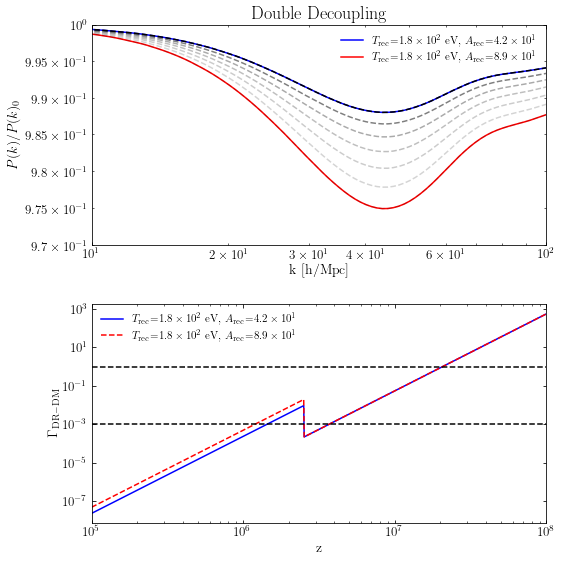

In [10]:
T_interps = np.logspace(np.log10(Tr1), np.log10(Tr2), num_interps)
A_interps = np.logspace(np.log10(Ar1), np.log10(Ar2), num_interps)

zs = np.logspace(5, 8, 1000)
dmus1 = np.array([dmu_idm_dr(Tr1, Ar1, z) for z in zs])
dmus2 = np.array([dmu_idm_dr(Tr2, Ar2, z) for z in zs])

fig = plt.figure(1, figsize=(8, 8))
plt.subplot(211)
plt.plot(
    kk,
    pk_dd_interp((Tr1, Ar1, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "b",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr1 * ktoev), scientific_format(Ar1)),
)
plt.plot(
    kk,
    pk_dd_interp((Tr2, Ar2, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "r",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr2 * ktoev), scientific_format(Ar2)),
)
for num_interp in range(num_interps):
    plt.plot(
        kk,
        pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))
        / pk_dd_interp((Tr0, Ar0, kk)),
        "--k",
        alpha=1 / (num_interp + 1),
    )
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e1, 1e2)
plt.ylim(0.97, 1)
plt.xlabel("k [h/Mpc]")
plt.ylabel("$P(k)/P(k)_0$")
plt.legend()
plt.title("Double Decoupling")
plt.subplot(212)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("$\Gamma_{\mathrm{DR-DM}}$")
plt.plot(
    zs,
    dmus1,
    "b",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr1 * ktoev), scientific_format(Ar1)),
)
plt.plot(
    zs,
    dmus2,
    "r--",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr2 * ktoev), scientific_format(Ar2)),
)
plt.plot(np.logspace(5, 8, 100), 1e-3 * np.ones(100), "--k")
plt.plot(np.logspace(5, 8, 100), np.ones(100), "--k")

plt.xlim(zs[0], zs[-1])

plt.legend()
fig.tight_layout(h_pad=2)

plt.show()

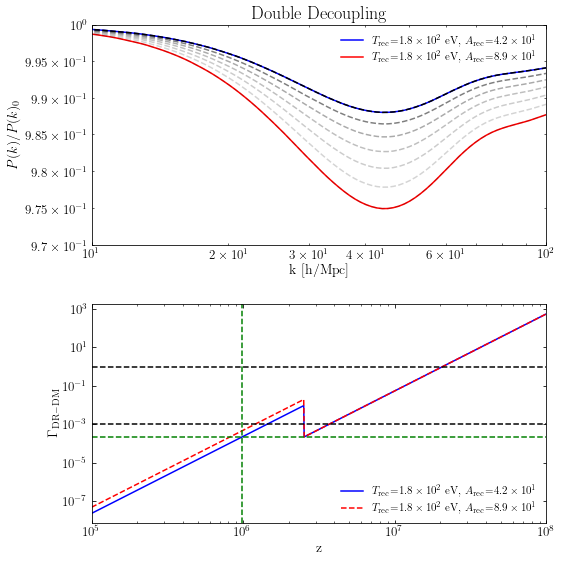

In [41]:
T_interps = np.logspace(np.log10(Tr1), np.log10(Tr2), num_interps)
A_interps = np.logspace(np.log10(Ar1), np.log10(Ar2), num_interps)

zs = np.logspace(5, 8, 1000)
dmus1 = np.array([dmu_idm_dr(Tr1, Ar1, z) for z in zs])
dmus2 = np.array([dmu_idm_dr(Tr2, Ar2, z) for z in zs])

fig = plt.figure(1, figsize=(8, 8))
plt.subplot(211)
plt.plot(
    kk,
    pk_dd_interp((Tr1, Ar1, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "b",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr1 * ktoev), scientific_format(Ar1)),
)
plt.plot(
    kk,
    pk_dd_interp((Tr2, Ar2, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "r",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr2 * ktoev), scientific_format(Ar2)),
)
for num_interp in range(num_interps):
    plt.plot(
        kk,
        pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))
        / pk_dd_interp((Tr0, Ar0, kk)),
        "--k",
        alpha=1 / (num_interp + 1),
    )

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e1, 1e2)
plt.ylim(0.97, 1)
plt.xlabel("k [h/Mpc]")
plt.ylabel("$P(k)/P(k)_0$")
plt.legend()
plt.title("Double Decoupling")
plt.subplot(212)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("$\Gamma_{\mathrm{DR-DM}}$")
plt.plot(
    zs,
    dmus1,
    "b",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr1 * ktoev), scientific_format(Ar1)),
)
plt.plot(
    zs,
    dmus2,
    "r--",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr2 * ktoev), scientific_format(Ar2)),
)
plt.plot(np.logspace(5, 8, 100), 1e-3 * np.ones(100), "--k")
plt.plot(np.logspace(5, 8, 100), np.ones(100), "--k")


plt.plot(np.logspace(5, 8, 100), dmu_rec_val* np.ones(100), "--g")
plt.axvline(zs[dec_idx], color='g', linestyle='--')


plt.xlim(zs[0], zs[-1])

plt.legend()
fig.tight_layout(h_pad=2)

plt.show()

In [43]:
BM_KS = [str(round(n,1)) for n in np.geomspace(1, 10, 5)]
k = BM_KS[0]

#Get data for case with no recoupling
data_file=h5pydir+'class_testing_no_rec.hdf5'
with h5py.File(data_file, 'r') as f:
    tau_data = np.array(f['scalar']['k='+str(k)]['tau [Mpc]'])
    delta_chi_data = np.array(f['scalar']['k='+str(k)]['delta_idm_dr'])
    phi_data = np.array(f['scalar']['k='+str(k)]['phi'])
    theta_dr_data = np.array(f['scalar']['k='+str(k)]['theta_idr'])
    theta_data = np.array(f['scalar']['k='+str(k)]['theta_idm_dr'])
    
    
    delta_chi_no_rec = UnivariateSpline(tau_data, delta_chi_data, **spline_pars)
    delta_chi_dot_no_rec = delta_chi_no_rec.derivative()
    phi_no_rec = UnivariateSpline(tau_data, phi_data, **spline_pars)
    phi_dot_no_rec = phi_no_rec.derivative()
    theta_dr_no_rec = UnivariateSpline(tau_data, theta_dr_data, **spline_pars)

    theta_chi_no_rec = UnivariateSpline(tau_data, theta_data, **spline_pars)
    theta_chi_dot_no_rec = theta_chi_no_rec.derivative()

    Pks_no_rec = np.array(f['power_spectrum']['Pk'])
    kks_no_rec = np.array(f['power_spectrum']['kk'])

    kappa_dot_data_no_rec = np.flip(np.array(f['thermodynamics']['dmu_idm_dr']))
    z_data_no_rec = np.flip(np.array(f['thermodynamics']['z']))
    thermo_tau_data_no_rec = np.flip(np.array(f['thermodynamics']['conf. time [Mpc]']))

    rho_idr_no_rec = np.array(f['background']['(.)rho_idr'])
    rho_idm_no_rec = np.array(f['background']['(.)rho_idm_dr'])
    bkg_zs_no_rec = np.array(f['background']['z'])
    clTT_no_rec = np.array(f['cmb']['tt'])
    ll_no_rec = np.array(f['cmb']['ell'])

    thermo_taus_no_rec = UnivariateSpline(np.flip(z_data_no_rec), np.flip(thermo_tau_data_no_rec), **spline_pars)


In [ ]:
def recoupling_time(T_rec, A_rec):
    """Recoupling time in Mpc"""
    zs = np.logspace(5, 8, 1000)
    dmus = np.array([dmu_idm_dr(T_rec, A_rec, z) for z in zs]) 
    rec_idx = argrelextrema(dmus, np.less)[0][0]
    dmu_rec_val = dmus[rec_idx]
    dec_idx = np.where(abs(1-dmus/dmu_rec_val) < 1e-2)[0][0]   
    rec_duration_tau = thermo_taus_no_rec(zs[dec_idx]).item() - thermo_taus_no_rec(zs[rec_idx]).item()
    return rec_duration_tau

In [114]:
print('rec duration tau: {:.3f} Mpc^-1'.format(recoupling_time(Tr2, Ar2)))

rec duration tau: 0.382 Mpc^-1


In [115]:
def recoupling_time_new(T_rec, A_rec):
    """Recoupling time in Mpc, defined as time spent above 1e-3 during recoupling"""
    zs = np.logspace(4, 8, 2000)
    dmus = np.array([dmu_idm_dr(T_rec, A_rec, z) for z in zs]) 
    crit_idxs = np.where(abs(1 - dmus/1e-3) < 2e-2)[0]
    if len(crit_idxs) <= 1:
        print("No recoupling found")
        return np.nan
    dec_idx = np.min(crit_idxs)
    rec_idx = np.max(crit_idxs)
    rec_duration_tau = thermo_taus_no_rec(zs[dec_idx]).item() - thermo_taus_no_rec(zs[rec_idx]).item()
    return rec_duration_tau

In [116]:
print('rec duration tau: {:.3f} Mpc^-1'.format(recoupling_time_new(Tr2, Ar2)))

rec duration tau: 0.263 Mpc^-1


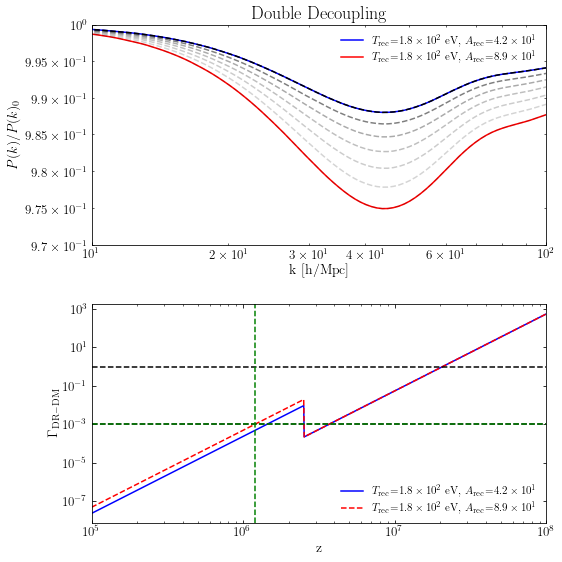

In [118]:
T_interps = np.logspace(np.log10(Tr1), np.log10(Tr2), num_interps)
A_interps = np.logspace(np.log10(Ar1), np.log10(Ar2), num_interps)

zs = np.logspace(5, 8, 1000)
dmus1 = np.array([dmu_idm_dr(Tr1, Ar1, z) for z in zs])
dmus2 = np.array([dmu_idm_dr(Tr2, Ar2, z) for z in zs])

fig = plt.figure(1, figsize=(8, 8))
plt.subplot(211)
plt.plot(
    kk,
    pk_dd_interp((Tr1, Ar1, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "b",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr1 * ktoev), scientific_format(Ar1)),
)
plt.plot(
    kk,
    pk_dd_interp((Tr2, Ar2, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "r",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr2 * ktoev), scientific_format(Ar2)),
)
for num_interp in range(num_interps):
    plt.plot(
        kk,
        pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))
        / pk_dd_interp((Tr0, Ar0, kk)),
        "--k",
        alpha=1 / (num_interp + 1),
    )

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e1, 1e2)
plt.ylim(0.97, 1)
plt.xlabel("k [h/Mpc]")
plt.ylabel("$P(k)/P(k)_0$")
plt.legend()
plt.title("Double Decoupling")
plt.subplot(212)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("$\Gamma_{\mathrm{DR-DM}}$")
plt.plot(
    zs,
    dmus1,
    "b",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr1 * ktoev), scientific_format(Ar1)),
)
plt.plot(
    zs,
    dmus2,
    "r--",
    label="$T_\mathrm{rec}$=%s eV, $A_\mathrm{rec}$=%s"
    % (scientific_format(Tr2 * ktoev), scientific_format(Ar2)),
)
plt.plot(np.logspace(5, 8, 100), 1e-3 * np.ones(100), "--k")
plt.plot(np.logspace(5, 8, 100), np.ones(100), "--k")

crit_idxs = np.where(abs(1 - dmus2/1e-3) < 2e-2)[0]
dec_idx = np.min(crit_idxs)
rec_idx = np.max(crit_idxs)
dmu_rec_val = dmus2[rec_idx]


plt.plot(np.logspace(5, 8, 100), dmu_rec_val* np.ones(100), "--g")
plt.axvline(zs[dec_idx], color='g', linestyle='--')


plt.xlim(zs[0], zs[-1])

plt.legend()
fig.tight_layout(h_pad=2)

plt.show()